# 豆瓣数据爬虫

In [1]:
import requests
import time
import random
from bs4 import BeautifulSoup


In [2]:
# 通过观察的url翻页的规律，使用for循环得到10个链接，保存到urls列表中
# urls = ['https://movie.douban.com/subject/34841067/comments?start={}&limit=20&status=P&sort=new_score'.format(str(i)) for i in range(0, 200, 20)]

# 先使用单条url测试
urls = "https://movie.douban.com/subject/34841067/comments?start=1&limit=20&status=P&sort=new_score"


爬虫发起get请求，对于有些网站，会拒绝掉没有携带header的请求的，所以需要做一些header增强，即提供User-Agent，Cookie，host等信息
我们得到的是一个Response对象，可以使用.text或者.content属性来获取
1.  text：是以字符串的形式返回数据
2.  content：是以二进制的方式返回数据

In [3]:
# 请求头
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36"
}
# 发送请求，.text返回的是字符串
r = requests.get(url=urls, headers=headers).text


Beautifulres解析HTML网页，传入的参数r：字符串（即网页源码），'html.parser'：指定解析器，解析html文件

In [4]:
# 使用BeautifulSoup解析HTML网页
res = BeautifulSoup(r, 'html.parser')


1.  res.title  获取文档的title
2.  res.title.string  获取title的内容
3.  res.p  获取文档中第一个p标签节点
4.  res.find_all('p', class_="comment-content") 获取所有class="comment-content"的p标签，返回list，包含了很多p标签

In [5]:
# 定位到评论的标签
p_list=res.find_all('span',class_="short")

In [6]:
# 存放评论的列表
comments_list = []


In [7]:
for p in p_list:
    # 评论内容
    comment = p.text.strip()
    # print(comment)
    # 保存到列表中
    comments_list.append(comment)


In [8]:
# 将comments_list列表中的评论写入到文件中
with open('comment.txt', 'w', encoding='utf-8') as f:
    for comment in comments_list:
        f.write(comment + '\n')


In [9]:
with open('comment.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        print(line)
        

贾玲水平有限，奈何感情无比真挚。虽然结尾让我哭的稀里哗啦，但也没能改变前半段就是个低配版夏洛特烦恼的状况。

有笑有泪的，不明白陈赫这个人物有什么作用，完全多余

贾玲：我给你们讲个笑话，你们别哭。

这完全是贾玲拍给自己的作品，不是拍给观众的，充满了个人的执念。

跟唐人街探案三的分数相比，很明显观众们评判电影的标准不仅在于你拍的好坏，而更在于你拍的态度是否真诚

前一个小时强行塞包袱，后面干嚎占二十分钟。。。

我以为是我在为你圆梦，其实还是你陪着我做了一场好梦。

7分。豆瓣8.2分过分了，就电影论电影的话，贾玲这部作品最大的问题在于它不太像电影（但也确实比小品形态提升了不少）。如果无视这一点，主要凭是否感动或者哭了多少眼泪来评价它的优劣，那就好比让情色片与AV同台竞技，主要凭观众生理反应的指标来评价优劣。 

同样是女性导演的亲情题材，许鞍华《桃姐》8.3分，张艾嘉《相爱相亲》8.4分，就是把贾玲纪念母亲的真诚用心全算上，它跟蒋雯丽《我们天上见》——同样演员出身的导演处女作，同样纪念自己至亲——也差了几条街，后者的确是一部电影，蒋雯丽之后没再做导演让我觉得可惜，而贾玲如果之后再做导演我只会觉得她是飘了。

如果你只是把它当成一件商品，那么眼泪的容量可以跟商品的质量成正比。如果你还把它当成一件艺术品，那么真诚只是优秀艺术品的要素之一，技巧和手法同等重要。【仙桃金逸】

8.3分绝对是太不正常了。《李焕英》你不能说它差，但也绝对称不上好，只是前些年综艺大电影版的变形罢了。主题选择了“子欲养而亲不在”，表达上却仅限于一味的情感宣泄，里面其实你很难找出一个完整鲜活的角色，母、女也只是传统文化几千年来堆砌出来的固定形象，除了伟大和孝顺找不到更多的形容词。

国产+喜剧+催泪＝烂片，这是豆瓣一贯的风气，因此我知道自己的评分一定不会公允，这里有掺杂太多我的主观感受：有生以来第一次在电影院哭得泣不成声。

昨晚是除夕，我和妈妈大吵了一架。她气得直骂我没良心、白眼狼，我爸也心寒地把我妈牵到楼下，说不指望以后让我给他们养老。

凌晨的时候，我给我妈朋友圈的拜年视频点了个赞，并发给她一个拜年红包，和她说“今晚我脾气不好，你别往心里去”我妈收下红包，给我发来好多幸福快乐的祝福。

今天看到这电影，许多情节点都让我泪眼婆娑，直到女儿明白真相后，一路奔跑的那一段蒙太奇，我极力掩着眼泪，

In [10]:
# To do: 使用上面的第一条url列表，将10个网页的评论都爬取下来，保存到sumComment.txt文件中
urls = ['https://movie.douban.com/subject/34841067/comments?start={}&limit=20&status=P&sort=new_score'.format(str(i)) for i in range(0, 200, 20)]

In [11]:
for url in urls:
    # 请求头
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 \
        (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36"
    }
    r = requests.get(url=url, headers=headers).text   
    res = BeautifulSoup(r, 'html.parser')
    p_list=res.find_all('span',class_="short")
    comments_list = []
    for p in p_list:
        comment = p.text.strip()
        comments_list.append(comment)
    with open('sumComment.txt', 'a', encoding='utf-8') as f:
        for comment in comments_list:
            f.write(comment + '\n')

with open('sumComment.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        print(line)

这次感受注定是感性压倒理性的，所以就不打分了。

贾玲还是适合做小品，她的表演方式、她的叙事能力都更适合能和观众互动的、短小精炼的舞台而不是要被观众一帧一帧检视的电影。更何况她非科班出身，参与电影项目也不多，要执导筒讲故事就更是自曝其短。

这是一部非常开心麻花式的片子，如果你喜欢《夏洛特烦恼》那么可以去看看，如果是抱着宁浩电影的期待那就赶紧睡个回笼觉，或者喝杯咖啡把瞌睡醒醒。

但说一千道一万，《你好李焕英》只能是贾玲来演、贾玲来导，它是贾玲自己的情感寄托和内心牵挂。哪怕在我觉得很尬的场景里，她对母亲的爱意和思念都饱满到要冲出屏幕来逼我落泪。我也确实掉了眼泪，在大年初一这天。

这种情绪不是浓汤宝能兑出来的煽情，哪怕我和她的人生轨迹并不相同，但我也在电影院里体会了一把贾玲的过往青春。

贾玲水平有限，奈何感情无比真挚。虽然结尾让我哭的稀里哗啦，但也没能改变前半段就是个低配版夏洛特烦恼的状况。

有笑有泪的，不明白陈赫这个人物有什么作用，完全多余

贾玲：我给你们讲个笑话，你们别哭。

这完全是贾玲拍给自己的作品，不是拍给观众的，充满了个人的执念。

跟唐人街探案三的分数相比，很明显观众们评判电影的标准不仅在于你拍的好坏，而更在于你拍的态度是否真诚

前一个小时强行塞包袱，后面干嚎占二十分钟。。。

我以为是我在为你圆梦，其实还是你陪着我做了一场好梦。

7分。豆瓣8.2分过分了，就电影论电影的话，贾玲这部作品最大的问题在于它不太像电影（但也确实比小品形态提升了不少）。如果无视这一点，主要凭是否感动或者哭了多少眼泪来评价它的优劣，那就好比让情色片与AV同台竞技，主要凭观众生理反应的指标来评价优劣。 

同样是女性导演的亲情题材，许鞍华《桃姐》8.3分，张艾嘉《相爱相亲》8.4分，就是把贾玲纪念母亲的真诚用心全算上，它跟蒋雯丽《我们天上见》——同样演员出身的导演处女作，同样纪念自己至亲——也差了几条街，后者的确是一部电影，蒋雯丽之后没再做导演让我觉得可惜，而贾玲如果之后再做导演我只会觉得她是飘了。

如果你只是把它当成一件商品，那么眼泪的容量可以跟商品的质量成正比。如果你还把它当成一件艺术品，那么真诚只是优秀艺术品的要素之一，技巧和手法同等重要。【仙桃金逸】

8.3分绝对是太不正常了。《李焕英》你不能说它差，但也绝对称不上好，只是前些年综艺大电影版的变形罢了。主题选

In [12]:
# To do: 爬取豆瓣电影评论区每个用户的名字，并存入到name.txt文件中
urls = ['https://movie.douban.com/subject/34841067/comments?start={}&limit=20&status=P&sort=new_score'.format(str(i)) for i in range(0, 200, 20)]   

for url in urls:
    # 请求头
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 \
        (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36"
    }
    r = requests.get(url=url, headers=headers).text   
    res = BeautifulSoup(r, 'html.parser')
    p_list=res.find_all('span',class_="comment-info")
    name_list = []
    for p in p_list:
        name = p.text.strip()
        name_list.append(name)
    with open('name.txt', 'a', encoding='utf-8') as f:
        for name in name_list:
            f.write(name + '\n')
            
with open('name.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        print(line)

大隐隐于没注销

看过



                    2021-02-12 13:00:53

北投少年他

看过





                    2021-02-12 11:09:35

韦斯安徒生

看过





                    2021-02-12 11:20:22

稻草上的小僵尸

看过





                    2021-02-12 10:22:31

Augenstern

看过





                    2021-02-12 10:10:39

停止狡辩

看过





                    2021-02-13 22:32:07

Sanny

看过





                    2021-02-12 12:18:00

温岭阿浪

看过





                    2021-02-12 10:58:36

𓆝𓆟𓆜𓆞𓆡

看过





                    2021-02-12 11:24:50

Ne.

看过





                    2021-02-12 12:00:45

梦中的日月

看过





                    2021-02-12 11:48:38

时亮九段

看过





                    2021-02-14 22:58:35

哈喽哇

看过





                    2021-02-13 21:31:47

想睡觉

看过





                    2021-02-13 09:31:02

盲忙

看过





                    2021-02-12 10:29:33

＃Lanius

看过





                    2021-02-17 12:28:36

惊蛰小白

看过





                    2021-02-12 10:13:08

八喜吃多了

看过





                    2021-02-24 01:34:

# 高德地图POI数据爬取

## 高德地图POI数据爬取练习

### 1、根据教程和高德API接口教程，自行爬取深圳技术大学10000米以内的餐饮服务类地区。（餐饮服务的types为050000）

In [13]:
import requests
import math
import json
import pandas as pd

In [14]:
key = "f2f33d3516eea1164bff246bc6bf03f6"
keywords = "餐饮服务"
city = 440300
extensions = "all"
offset = 20
page = 1

url = "https://restapi.amap.com/v3/place/text?key={}&keywords={}&city={}&extensions={}&offset={}&page={}".format(key, keywords, city, extensions, offset, page)

In [16]:
r = requests.get(url)
print(r.status_code)
print(r.text)

200
{"suggestion":{"keywords":[],"cities":[]},"count":"897","infocode":"10000","pois":[{"parent":"B0FFF4QWA3","distance":[],"pcode":"440000","importance":[],"biz_ext":{"cost":"44.00","rating":"4.5","meal_ordering":"0"},"recommend":"0","type":"餐饮服务;快餐厅;快餐厅","photos":[{"title":[],"url":"http://store.is.autonavi.com/showpic/4a2e954612737a58fe36a5b98b3bf2e8"},{"title":[],"url":"http://store.is.autonavi.com/showpic/c58e979e069909fbe1a08543d4c7e435"},{"title":[],"url":"http://store.is.autonavi.com/showpic/f054bc9311eb61443181e3b02219fc42"}],"discount_num":"0","gridcode":"3314605402","typecode":"050300","shopinfo":"1","poiweight":[],"citycode":"0755","adname":"福田区","children":[],"alias":[],"tel":"4008988788","id":"B0FFGZU19T","tag":"汉堡,薯条,鸡翅,鸡块,牛腩,盐酥鸡,烤猪","event":[],"entr_location":"114.0616,22.542711","indoor_map":"0","email":[],"timestamp":"2023-10-25 03:02:02","website":[],"address":"福中三路市民中心地铁站B出口负一楼29号铺","adcode":"440304","pname":"广东省","biz_type":"diner","cityname":"深圳市","postcode":[],"m

In [20]:
# address = "深圳技术大学"
# city = 440300
# output="JSON"
# 
# url = "https://restapi.amap.com/v3/geocode/geo?key={}&address={}&city={}&output={}".format(key, address, city, output)
# 
# r = requests.get(url)
# print(r.status_code)
# print(r.text)
address = "深圳技术大学"
city = 440300
output = "JSON"

geocode_url = "https://restapi.amap.com/v3/geocode/geo?key={}&address={}&city={}&output={}".format(key, address, city, output)
geocode_response = requests.get(geocode_url)
geocode_data = json.loads(geocode_response.text)

location = geocode_data["geocodes"][0]["location"]
latitude, longitude = location.split(',')

keywords = "餐饮服务"
types = "050000"
offset = 20 

def GetOnePage(url):
    req = requests.get(url)
    dic = json.loads(req.text)
    return dic
def GetAllPage(dic):
    pois = []
    page_count = math.ceil(int(dic['count']) / offset)

    for i in range(1, page_count + 1):
        url = f'https://restapi.amap.com/v3/place/text?keywords={keywords}&types={types}&citylimit=true&city={city}&output={output}&location={longitude},{latitude}&radius=10000&offset={offset}&page={i}&key={key}'
        dic = GetOnePage(url)

        for item in dic['pois']:
            pois.append(item)

    return pois

pois = GetAllPage(geocode_data)

df = pd.DataFrame(pois)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   parent      20 non-null     object
 1   address     20 non-null     object
 2   distance    20 non-null     object
 3   pname       20 non-null     object
 4   importance  20 non-null     object
 5   biz_ext     20 non-null     object
 6   biz_type    20 non-null     object
 7   cityname    20 non-null     object
 8   type        20 non-null     object
 9   photos      20 non-null     object
 10  typecode    20 non-null     object
 11  shopinfo    20 non-null     object
 12  poiweight   20 non-null     object
 13  childtype   20 non-null     object
 14  adname      20 non-null     object
 15  name        20 non-null     object
 16  location    20 non-null     object
 17  tel         20 non-null     object
 18  shopid      20 non-null     object
 19  id          20 non-null     object
dtypes: object(20

### 2、将这些数据生成pandas的DataFrame格式，并根据距离进行分箱，分为[(0, 50] < (50, 100] < (100, 150] < (150, 200] < (200, 250] < (250, 300] < (300, 500]6类。


In [21]:
df.head()

,parent,address,distance,pname,importance,biz_ext,biz_type,cityname,type,photos,typecode,shopinfo,poiweight,childtype,adname,name,location,tel,shopid,id
0,[],石井社区田头街道马鞍岭东区1巷1号,[],广东省,[],"{'cost': [], 'opentime2': '10:00-02:00', 'rati...",diner,深圳市,餐饮服务;中餐厅;清真菜馆,"[{'title': [], 'url': 'http://store.is.autonav...",050121,1,[],[],坪山区,刀哥新疆美食(新疆炒米粉),"114.403334,22.701888",13999995206;18999995206,[],B0I0J57R6R
1,[],石井街道田头社区马鞍岭东区一巷2号,[],广东省,[],"{'cost': [], 'opentime2': '09:00-21:00', 'rati...",diner,深圳市,餐饮服务;中餐厅;湖南菜(湘菜),"[{'title': [], 'url': 'http://store.is.autonav...",050108,1,[],[],坪山区,常湘缘湘菜馆,"114.403370,22.702020",18824665335,[],B0FFL6D9K6
2,[],石井街道马鞍岭路一巷8号,[],广东省,[],"{'cost': [], 'opentime2': '08:00-20:00', 'rati...",diner,深圳市,餐饮服务;快餐厅;快餐厅,"[{'title': [], 'url': 'http://store.is.autonav...",050300,1,[],[],坪山区,乐其快餐店,"114.403272,22.702703",13421306848,[],B0FFMBBAKS
3,[],龙田街道竹坑社区第三工业区生活中心综合楼A栋A108,[],广东省,[],"{'cost': [], 'opentime2': '10:00-03:00', 'rati...",diner,深圳市,餐饮服务;中餐厅;火锅店,"[{'title': [], 'url': 'http://store.is.autonav...",050117,1,[],[],坪山区,小龙坎火锅(坪山竹坑店),"114.397534,22.711446",18813226992,[],B0JU5575IX
4,[],创鞍路与马鞍岭路交叉口西北60米,[],广东省,[],"{'cost': [], 'opentime2': [], 'rating': '3.8',...",diner,深圳市,餐饮服务;中餐厅;特色/地方风味餐厅,[],050118,0,[],[],坪山区,鸿儒烤吧,"114.402700,22.701929",18033448820,[],B0JBOZJLLZ


In [24]:
# your code
sztech_location = (22.702861, 114.400057)  
def get_distance(location1, location2): # ha公式
    lat1, lng1 = location1
    lat2, lng2 = location2
    lat1, lng1, lat2, lng2 = map(math.radians, [lat1, lng1, lat2, lng2])
    dlng = lng2 - lng1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * \
        math.cos(lat2) * math.sin(dlng / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371  
    return c * r 

df['distance'] = df.apply(lambda x: get_distance(sztech_location, (float(x['location'].split(',')[1]), float(x['location'].split(',')[0]))), axis=1)

df.head()

,parent,address,distance,pname,importance,biz_ext,biz_type,cityname,type,photos,typecode,shopinfo,poiweight,childtype,adname,name,location,tel,shopid,id
0,[],石井社区田头街道马鞍岭东区1巷1号,0.353136,广东省,[],"{'cost': [], 'opentime2': '10:00-02:00', 'rati...",diner,深圳市,餐饮服务;中餐厅;清真菜馆,"[{'title': [], 'url': 'http://store.is.autonav...",050121,1,[],[],坪山区,刀哥新疆美食(新疆炒米粉),"114.403334,22.701888",13999995206;18999995206,[],B0I0J57R6R
1,[],石井街道田头社区马鞍岭东区一巷2号,0.352478,广东省,[],"{'cost': [], 'opentime2': '09:00-21:00', 'rati...",diner,深圳市,餐饮服务;中餐厅;湖南菜(湘菜),"[{'title': [], 'url': 'http://store.is.autonav...",050108,1,[],[],坪山区,常湘缘湘菜馆,"114.403370,22.702020",18824665335,[],B0FFL6D9K6
2,[],石井街道马鞍岭路一巷8号,0.330261,广东省,[],"{'cost': [], 'opentime2': '08:00-20:00', 'rati...",diner,深圳市,餐饮服务;快餐厅;快餐厅,"[{'title': [], 'url': 'http://store.is.autonav...",050300,1,[],[],坪山区,乐其快餐店,"114.403272,22.702703",13421306848,[],B0FFMBBAKS
3,[],龙田街道竹坑社区第三工业区生活中心综合楼A栋A108,0.989068,广东省,[],"{'cost': [], 'opentime2': '10:00-03:00', 'rati...",diner,深圳市,餐饮服务;中餐厅;火锅店,"[{'title': [], 'url': 'http://store.is.autonav...",050117,1,[],[],坪山区,小龙坎火锅(坪山竹坑店),"114.397534,22.711446",18813226992,[],B0JU5575IX
4,[],创鞍路与马鞍岭路交叉口西北60米,0.290250,广东省,[],"{'cost': [], 'opentime2': [], 'rating': '3.8',...",diner,深圳市,餐饮服务;中餐厅;特色/地方风味餐厅,[],050118,0,[],[],坪山区,鸿儒烤吧,"114.402700,22.701929",18033448820,[],B0JBOZJLLZ


In [25]:
# END
bins = [0, 50, 100, 150, 200, 250, 300, 500]
df['distance_cut'] = pd.cut(df['distance'], bins)
df.head()

,parent,address,distance,pname,importance,biz_ext,biz_type,cityname,type,photos,...,shopinfo,poiweight,childtype,adname,name,location,tel,shopid,id,distance_cut
0,[],石井社区田头街道马鞍岭东区1巷1号,0.353136,广东省,[],"{'cost': [], 'opentime2': '10:00-02:00', 'rati...",diner,深圳市,餐饮服务;中餐厅;清真菜馆,"[{'title': [], 'url': 'http://store.is.autonav...",...,1,[],[],坪山区,刀哥新疆美食(新疆炒米粉),"114.403334,22.701888",13999995206;18999995206,[],B0I0J57R6R,"(0, 50]"
1,[],石井街道田头社区马鞍岭东区一巷2号,0.352478,广东省,[],"{'cost': [], 'opentime2': '09:00-21:00', 'rati...",diner,深圳市,餐饮服务;中餐厅;湖南菜(湘菜),"[{'title': [], 'url': 'http://store.is.autonav...",...,1,[],[],坪山区,常湘缘湘菜馆,"114.403370,22.702020",18824665335,[],B0FFL6D9K6,"(0, 50]"
2,[],石井街道马鞍岭路一巷8号,0.330261,广东省,[],"{'cost': [], 'opentime2': '08:00-20:00', 'rati...",diner,深圳市,餐饮服务;快餐厅;快餐厅,"[{'title': [], 'url': 'http://store.is.autonav...",...,1,[],[],坪山区,乐其快餐店,"114.403272,22.702703",13421306848,[],B0FFMBBAKS,"(0, 50]"
3,[],龙田街道竹坑社区第三工业区生活中心综合楼A栋A108,0.989068,广东省,[],"{'cost': [], 'opentime2': '10:00-03:00', 'rati...",diner,深圳市,餐饮服务;中餐厅;火锅店,"[{'title': [], 'url': 'http://store.is.autonav...",...,1,[],[],坪山区,小龙坎火锅(坪山竹坑店),"114.397534,22.711446",18813226992,[],B0JU5575IX,"(0, 50]"
4,[],创鞍路与马鞍岭路交叉口西北60米,0.290250,广东省,[],"{'cost': [], 'opentime2': [], 'rating': '3.8',...",diner,深圳市,餐饮服务;中餐厅;特色/地方风味餐厅,[],...,0,[],[],坪山区,鸿儒烤吧,"114.402700,22.701929",18033448820,[],B0JBOZJLLZ,"(0, 50]"


# 数据预处理

## 泰坦尼克号数据预处理

### 读取数据titanic.csv 显示前五行

In [26]:
# your code
train = pd.read_csv('titanic.csv')
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 空值和缺失值的处理

In [27]:
# 检查该tai数据中是否有空值
# your code
print(train.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [28]:
# 删除数据集中年龄这一列有空值和缺失值的行
# your code
train.dropna(subset=['age'], inplace=True)

In [30]:
# 用S来填补embarked这一列中的缺失值
# your code
train['embarked'].fillna('S', inplace=True)
print(train['embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
885    Q
886    S
887    S
889    C
890    Q
Name: embarked, Length: 714, dtype: object


In [31]:
# 使用前向填充的方式替换embark_town列中的空值或缺失值
# your code
train['embark_town'].fillna(method='ffill', inplace=True)
print(train['embark_town'])

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
885     Queenstown
886    Southampton
887    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 714, dtype: object


### 重复值的处理

In [32]:
# 列出数据中重复的行
# your code
print(train[train.duplicated()])

     survived  pclass     sex    age  sibsp  parch     fare embarked   class  \
133         1       2  female  29.00      1      0  26.0000        S  Second   
173         0       3    male  21.00      0      0   7.9250        S   Third   
213         0       2    male  30.00      0      0  13.0000        S  Second   
313         0       3    male  28.00      0      0   7.8958        S   Third   
320         0       3    male  22.00      0      0   7.2500        S   Third   
343         0       2    male  25.00      0      0  13.0000        S  Second   
355         0       3    male  28.00      0      0   9.5000        S   Third   
418         0       2    male  30.00      0      0  13.0000        S  Second   
476         0       2    male  34.00      1      0  21.0000        S  Second   
488         0       3    male  30.00      0      0   8.0500        S   Third   
494         0       3    male  21.00      0      0   8.0500        S   Third   
500         0       3    male  17.00    

In [34]:
# 删除数据中重复的行
# your code
train.drop_duplicates(inplace=True)
print(train[train.duplicated()])

Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone]
Index: []


### 异常值的处理

In [35]:
# 输出数据的描述性统计信息
# your code
print(train.describe())

         survived      pclass         age       sibsp       parch       fare
count  678.000000  678.000000  678.000000  678.000000  678.000000  678.00000
mean     0.418879    2.219764   29.869351    0.533923    0.452802   35.80416
std      0.493740    0.847496   14.759076    0.945111    0.869634   54.00290
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.00000
25%      0.000000    1.000000   20.000000    0.000000    0.000000    8.05000
50%      0.000000    2.000000   28.250000    0.000000    0.000000   16.10000
75%      1.000000    3.000000   39.000000    1.000000    1.000000   35.28855
max      1.000000    3.000000   80.000000    5.000000    6.000000  512.32920


In [36]:
import numpy as np
# 基于3σ原则检测异常值
# ser1 表示传入DataFrame的某一列
def three_sigma(ser1): 
    # 第一步：求平均值
    m=ser1.mean()
    # 第二步：求标准差
    s=ser1.std()
    # 位于(μ-3σ,μ+3σ)区间的数据是正常的，不在这个区间的数据为异常的
    # ser1中的数值小于μ-3σ或大于μ+3σ均为异常值
    # 第三步：一旦发现有异常值，就标注为True，否则标注为False
    rule=(m-3*s>ser1)|(m+3*s<ser1)
    # 第四步：获取异常数据outrange
    outrange=ser1.loc[rule]
    return outrange

In [37]:
# 检测tai的fare列是否有异常值
# your code
print(three_sigma(train['fare']))

27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: fare, dtype: float64


In [38]:
data = train.copy()

In [39]:
#编写代码，利用箱型图检测方法找出age列的异常值
Q = data['age'].quantile([0.25, 0.5, 0.75])
IQR = Q.iloc[2]-Q.iloc[0]
QL = Q.iloc[0]-1.5*IQR
QU = Q.iloc[2]+1.5*IQR
# your code
print(data[(data['age']<QL)|(data['age']>QU)])

     survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
96          0       1  male  71.0      0      0  34.6542        C   First   
116         0       3  male  70.5      0      0   7.7500        Q   Third   
493         0       1  male  71.0      0      0  49.5042        C   First   
630         1       1  male  80.0      0      0  30.0000        S   First   
672         0       2  male  70.0      0      0  10.5000        S  Second   
745         0       1  male  70.0      1      1  71.0000        S   First   
851         0       3  male  74.0      0      0   7.7750        S   Third   

     who  adult_male deck  embark_town alive  alone  
96   man        True    A    Cherbourg    no   True  
116  man        True  NaN   Queenstown    no   True  
493  man        True  NaN    Cherbourg    no   True  
630  man        True    A  Southampton   yes   True  
672  man        True  NaN  Southampton    no   True  
745  man        True    B  Southampton    no  False  
851  

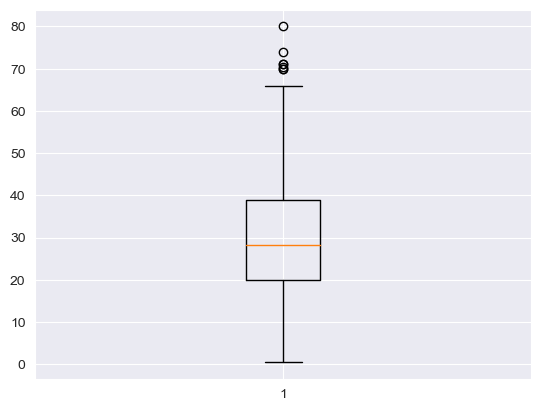

In [40]:
# 画出箱型图来查看age列中的异常值
import matplotlib.pyplot as plt

# your code
plt.boxplot(data['age'])
plt.show()

### 数值类数据处理

In [41]:
# 保留fare列中三位小数
# your code
data['fare'] = data['fare'].apply(lambda x: round(x, 3))
print(data['fare'])

0       7.250
1      71.283
2       7.925
3      53.100
4       8.050
        ...  
883    10.500
885    29.125
887    30.000
889    30.000
890     7.750
Name: fare, Length: 678, dtype: float64


In [42]:
# 将age列进行分箱操作并将结果存入age1列中，按0-20，20-60，60-100分为年少，壮年，年迈三类
# your code
bins = [0, 20, 60, 100]
data['age1'] = pd.cut(data['age'], bins, labels=['年少', '壮年', '年迈'])
print(data['age1'])

0      壮年
1      壮年
2      壮年
3      壮年
4      壮年
       ..
883    壮年
885    壮年
887    年少
889    壮年
890    壮年
Name: age1, Length: 678, dtype: category
Categories (3, object): ['年少' < '壮年' < '年迈']
